# Jacopo Magnani

## Predicting Cancer Treatment Cost

#### Imports

In [1]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import (accuracy_score, confusion_matrix)

#### Downloading csv_file

Download the following file into the same folder as your ipynb file 
https://www.kaggle.com/datasets/zahidmughal2343/global-cancer-patients-2015-2024

Source:
Feroze, Zahid. “Global_cancer_patients_2015_2024.” Kaggle, 14 Apr. 2025, www.kaggle.com/datasets/zahidmughal2343/global-cancer-patients-2015-2024.

In [2]:
# Download latest version
patient_df = pd.read_csv('global_cancer_patients_2015_2024.csv')
print(patient_df.shape)


(50000, 15)


#### Data Visualization

In [3]:
patient_df

Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  \
0      PT0000000   71    Male             UK  2021           6.4   
1      PT0000001   34    Male          China  2021           1.3   
2      PT0000002   80    Male       Pakistan  2023           7.4   
3      PT0000003   40    Male             UK  2015           1.7   
4      PT0000004   43  Female         Brazil  2017           5.1   
...          ...  ...     ...            ...   ...           ...   
49995  PT0049995   80    Male       Pakistan  2023           2.3   
49996  PT0049996   40  Female            USA  2018           6.4   
49997  PT0049997   74    Male       Pakistan  2015           6.2   
49998  PT0049998   21    Male         Brazil  2018           4.0   
49999  PT0049999   22    Male       Pakistan  2023           5.1   

       Air_Pollution  Alcohol_Use  Smoking  Obesity_Level Cancer_Type  \
0                2.8          9.5      0.9            8.7        Lung   
1                4.5          3.7      3.9            6.3    Leukemia   
2                7.9          2.4      4.7            0.1      Breast   
3                2.9          4.8      3.5            2.7       Colon   
4                2.8          2.3      6.7            0.5        Skin   
...              ...          ...      ...            ...         ...   
49995            7.5          2.8      3.8            2.9    Leukemia   
49996            3.5          2.9      9.0            9.8       Colon   
49997            1.6          8.7      4.7            4.0      Breast   
49998            6.5          7.6      8.6            8.1       Liver   
49999            9.8          3.2      0.0            0.7       Liver   

      Cancer_Stage  Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0        Stage III            62913.44             5.9                   4.92  
1          Stage 0            12573.41             4.7                   4.65  
2         Stage II             6984.33             7.1                   5.84  
3          Stage I            67446.25             1.6                   3.12  
4        Stage III            77977.12             2.9                   3.62  
...            ...                 ...             ...                    ...  
49995      Stage 0            71463.70             1.0                   3.63  
49996      Stage I            49619.66             0.4                   6.03  
49997      Stage 0             5338.25             2.7                   6.02  
49998     Stage IV            45100.47             7.5                   6.54  
49999      Stage 0            64023.82             7.4                   3.76  

[50000 rows x 15 columns]

ChatGPT was used in the following cell to improve the way the data is visualized. Originally the output was cluttered and difficult to read and ChatGPT gave me a better method for displaying the ouput. The link to the converstation is below. 
ChatGPT. "Formatting Patient Data Output for Better Readability." ChatGPT, OpenAI, 6 May 2025, chat.openai.com.
https://chatgpt.com/share/681a6b59-01bc-800b-a794-65f02e141954

In [4]:
patient_keys = patient_df.keys()
print("Keys: ", patient_keys.values)
print()

ages, age_counts = np.unique(patient_df["Age"], return_counts=True)
age_df = pd.DataFrame({"Age": ages, "Count": age_counts})
print("==== Patient Age Distribution ====")
print(age_df.to_string(index=False))
print()

countries, country_counts = np.unique(patient_df["Country_Region"], return_counts=True)
country_df = pd.DataFrame({"Country": countries, "Count": country_counts})
print("==== Patient Country Distribution ====")
print(country_df.to_string(index=False))
print()

types, type_counts = np.unique(patient_df["Cancer_Type"], return_counts=True)
type_df = pd.DataFrame({"Cancer_Type": types, "Count": type_counts})
print("==== Cancer Type Distribution ====")
print(type_df.to_string(index=False))
print()

stages, stage_counts = np.unique(patient_df["Cancer_Stage"], return_counts=True)
stage_df = pd.DataFrame({"Cancer_Stage": stages, "Count": stage_counts})
print("==== Cancer Stage Distribution ====")
print(stage_df.to_string(index=False))
print()

Keys:  ['Patient_ID' 'Age' 'Gender' 'Country_Region' 'Year' 'Genetic_Risk'
 'Air_Pollution' 'Alcohol_Use' 'Smoking' 'Obesity_Level' 'Cancer_Type'
 'Cancer_Stage' 'Treatment_Cost_USD' 'Survival_Years'
 'Target_Severity_Score']

==== Patient Age Distribution ====
 Age  Count
  20    703
  21    740
  22    722
  23    725
  24    737
  25    728
  26    682
  27    702
  28    723
  29    729
  30    693
  31    706
  32    766
  33    684
  34    739
  35    722
  36    758
  37    722
  38    727
  39    666
  40    755
  41    718
  42    723
  43    712
  44    696
  45    747
  46    700
  47    734
  48    735
  49    732
  50    666
  51    722
  52    675
  53    668
  54    677
  55    734
  56    694
  57    742
  58    703
  59    705
  60    679
  61    705
  62    675
  63    757
  64    741
  65    684
  66    704
  67    743
  68    692
  69    685
  70    731
  71    748
  72    703
  73    730
  74    696
  75    701
  76    693
  77    785
  78    719
  79    722
  80  

In [5]:
print(patient_df.head())  # To see the first few rows of the DataFrame
print(patient_df.shape)  # To check if the shape of the DataFrame is correct

  Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
0  PT0000000   71    Male             UK  2021           6.4            2.8   
1  PT0000001   34    Male          China  2021           1.3            4.5   
2  PT0000002   80    Male       Pakistan  2023           7.4            7.9   
3  PT0000003   40    Male             UK  2015           1.7            2.9   
4  PT0000004   43  Female         Brazil  2017           5.1            2.8   

   Alcohol_Use  Smoking  Obesity_Level Cancer_Type Cancer_Stage  \
0          9.5      0.9            8.7        Lung    Stage III   
1          3.7      3.9            6.3    Leukemia      Stage 0   
2          2.4      4.7            0.1      Breast     Stage II   
3          4.8      3.5            2.7       Colon      Stage I   
4          2.3      6.7            0.5        Skin    Stage III   

   Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0            62913.44             5.9                   4.9

Data cleaning and mapping

In [6]:
patient_df.dropna()
patient_df.drop(['Patient_ID','Year'], axis=1, inplace=True)

gender_map = {
    "Male": 1,
    "Female": 2
}
stage_map = {
    "Stage 0": 0,
    "Stage I": 1,
    "Stage II": 2,
    "Stage III": 3,
    "Stage IV": 4
}

types_map = {
    "Breast": 1,
    "Cervical": 2,
    "Colon": 3,
    "Leukemia": 4,
    "Liver": 5,
    "Lung": 6,
    "Prostate": 7,
    "Skin": 8
}

countries_map = {
    "USA": 1,
    "Australia": 2,
    "Brazil": 3,
    "Canada": 4,
    "China": 5,
    "Germany": 6,
    "India": 7,
    "Pakistan": 8,
    "Russia": 9,
    "UK": 10
}

patient_df["Cancer_Stage"] = patient_df["Cancer_Stage"].map(stage_map)
patient_df["Cancer_Type"] = patient_df["Cancer_Type"].map(types_map)
patient_df["Country_Region"] = patient_df["Country_Region"].map(countries_map)
patient_df["Gender"] = patient_df["Gender"].map(gender_map)

print(patient_df.shape)
patient_df

(50000, 13)


Age  Gender  Country_Region  Genetic_Risk  Air_Pollution  Alcohol_Use  \
0       71     1.0              10           6.4            2.8          9.5   
1       34     1.0               5           1.3            4.5          3.7   
2       80     1.0               8           7.4            7.9          2.4   
3       40     1.0              10           1.7            2.9          4.8   
4       43     2.0               3           5.1            2.8          2.3   
...    ...     ...             ...           ...            ...          ...   
49995   80     1.0               8           2.3            7.5          2.8   
49996   40     2.0               1           6.4            3.5          2.9   
49997   74     1.0               8           6.2            1.6          8.7   
49998   21     1.0               3           4.0            6.5          7.6   
49999   22     1.0               8           5.1            9.8          3.2   

       Smoking  Obesity_Level  Cancer_Type  Cancer_Stage  Treatment_Cost_USD  \
0          0.9            8.7            6             3            62913.44   
1          3.9            6.3            4             0            12573.41   
2          4.7            0.1            1             2             6984.33   
3          3.5            2.7            3             1            67446.25   
4          6.7            0.5            8             3            77977.12   
...        ...            ...          ...           ...                 ...   
49995      3.8            2.9            4             0            71463.70   
49996      9.0            9.8            3             1            49619.66   
49997      4.7            4.0            1             0             5338.25   
49998      8.6            8.1            5             4            45100.47   
49999      0.0            0.7            5             0            64023.82   

       Survival_Years  Target_Severity_Score  
0                 5.9                   4.92  
1                 4.7                   4.65  
2                 7.1                   5.84  
3                 1.6                   3.12  
4                 2.9                   3.62  
...               ...                    ...  
49995             1.0                   3.63  
49996             0.4                   6.03  
49997             2.7                   6.02  
49998             7.5                   6.54  
49999             7.4                   3.76  

[50000 rows x 13 columns]

The following plot may take around 2 or 3 minutes to load

C:\Users\jacop\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


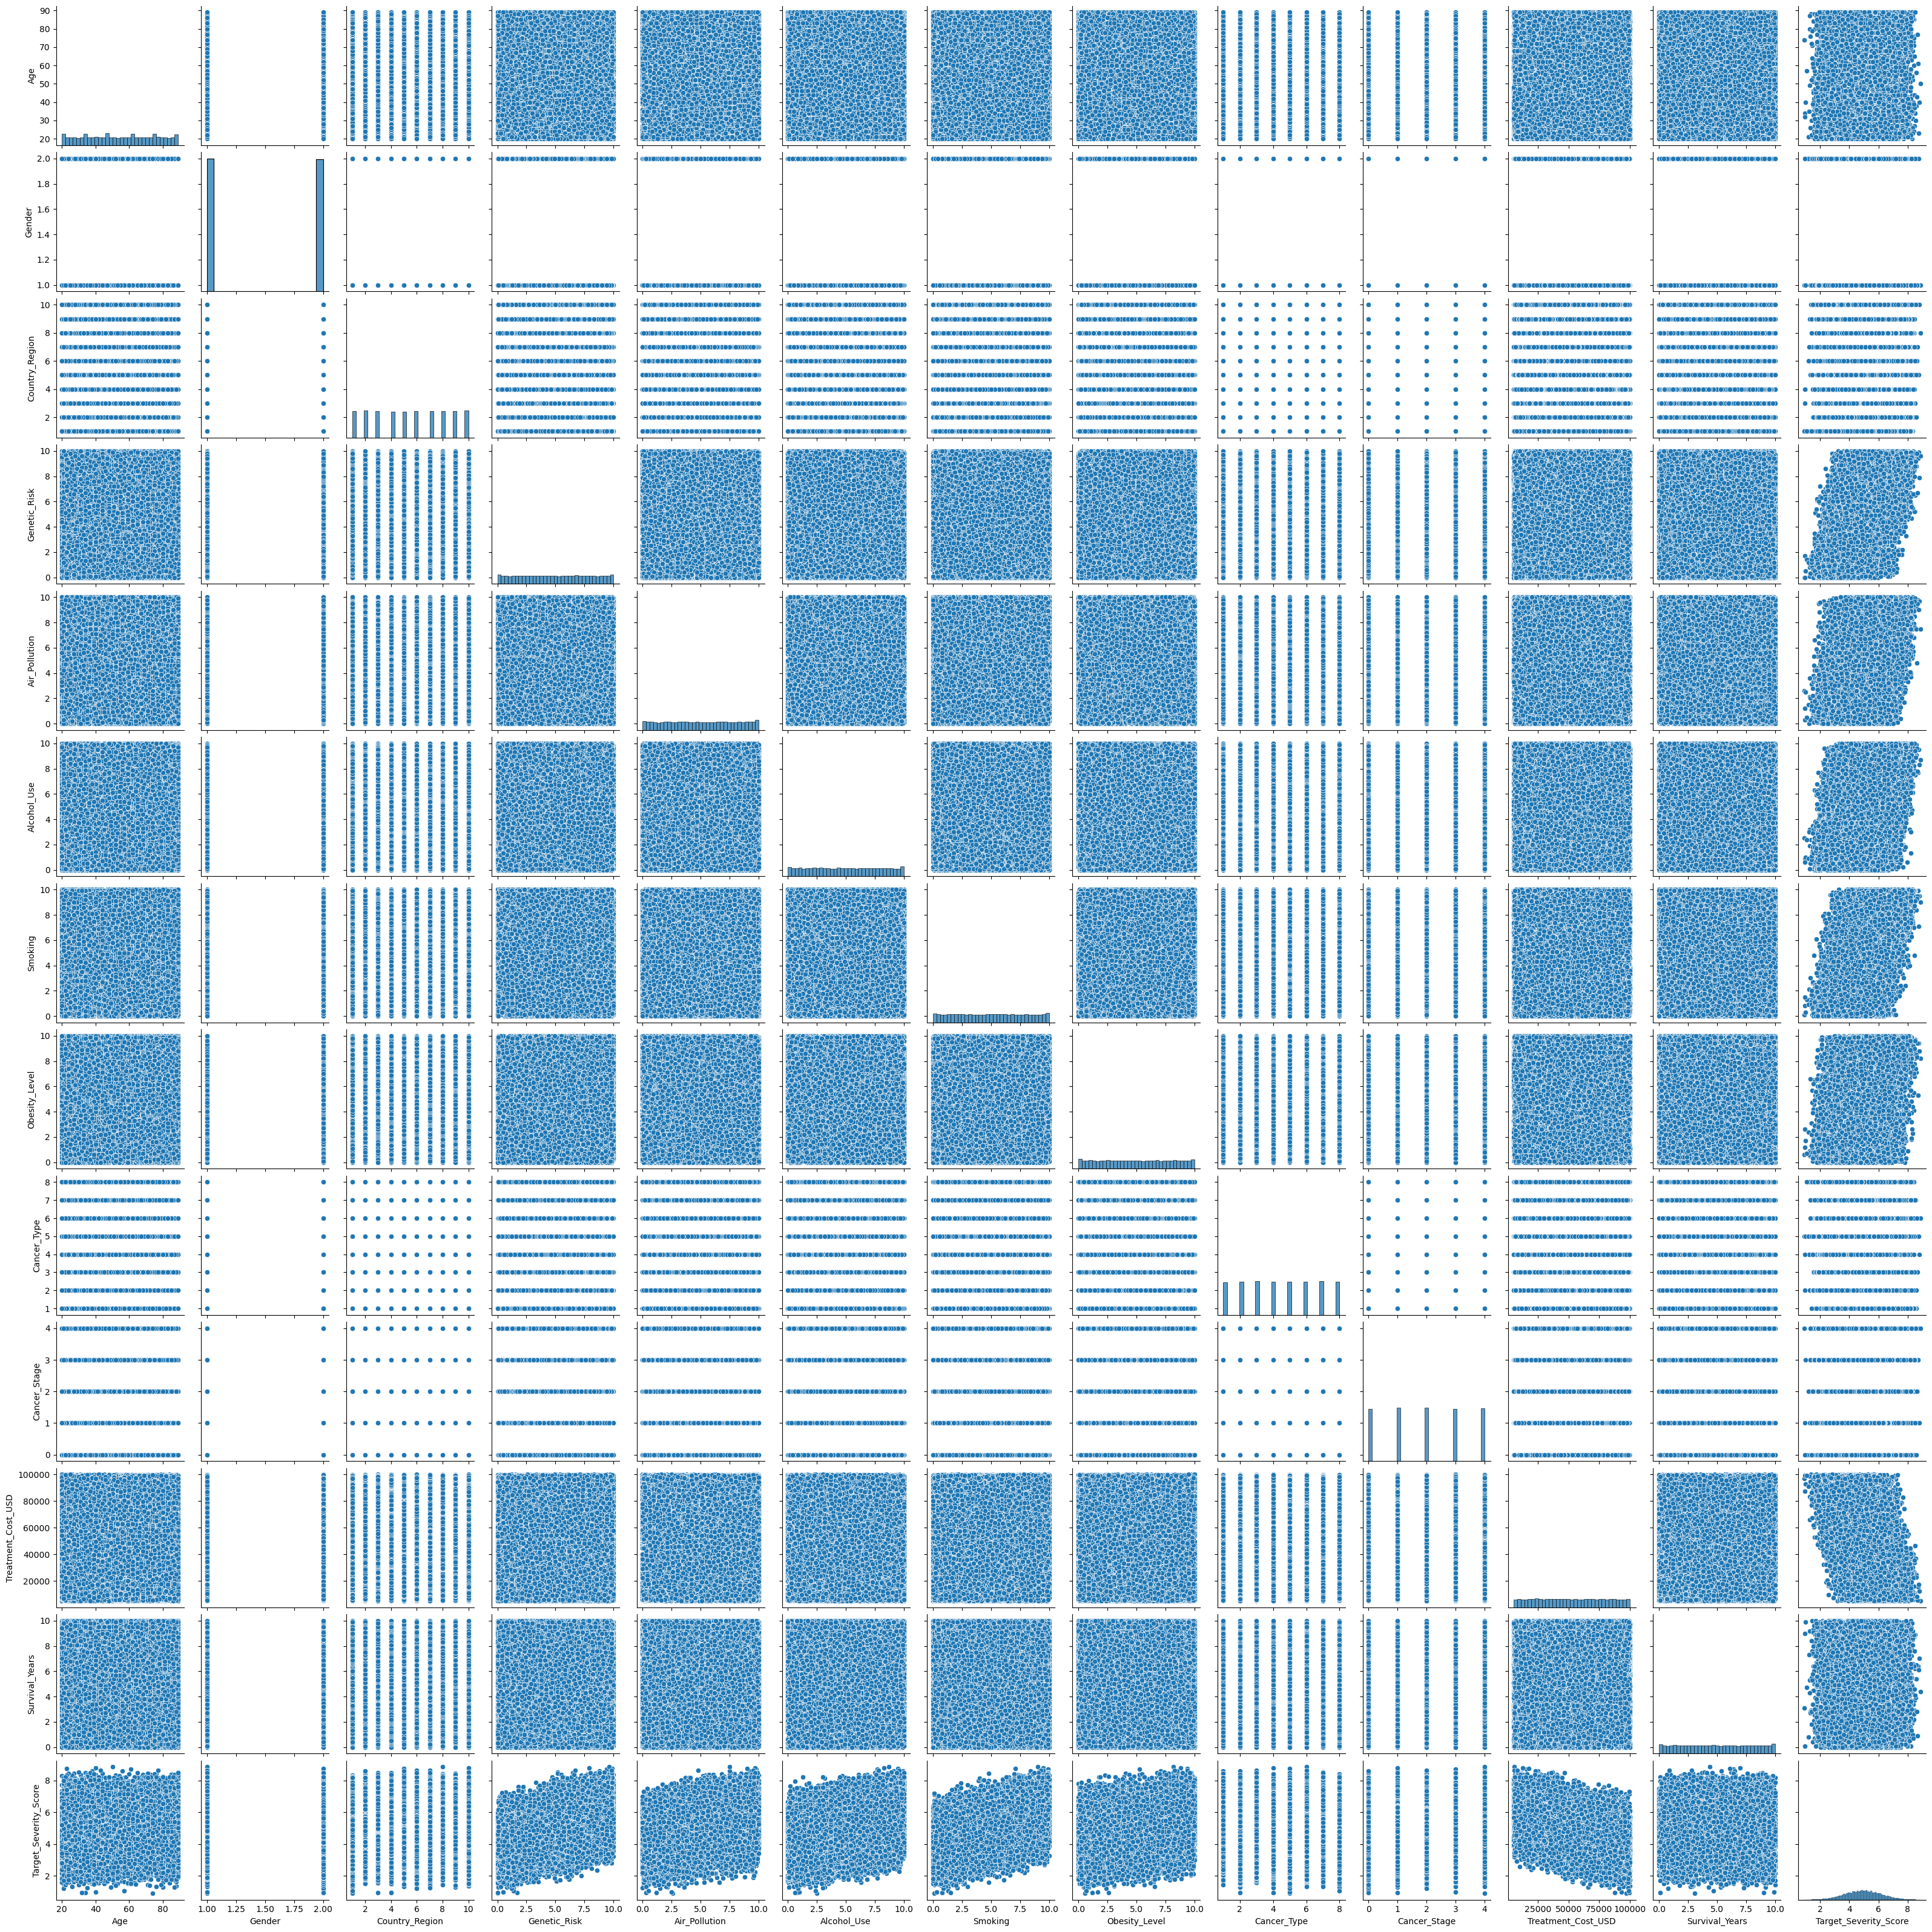

In [7]:
'''“Pandas.Dataframe.Select_dtypes#.” Pandas.DataFrame.Select_dtypes - Pandas 2.2.3 Documentation,
pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html. Accessed 1 May 2025.''' 

p_df = patient_df.select_dtypes(include=['float64', 'int64'])
p_df.dropna(inplace = True)

sns.pairplot(p_df)
plt.show()

### Ridge Regression

#### Data Spliting

In [8]:
def poly_features(X: np.ndarray, degree: int) -> np.ndarray:
    """ Compute polynomial features for pass data

        Args:
            X: Matrix of input data for which polynomial features
                will be computed for.

            degree: The degree of the polynomial which will be computed.

        Return:
            A matrix containing the original data and the new polynomial data.
    """
   
    if degree == 1:
        return X
   
    X_poly = X
    for i in range(2, degree + 1):
        X_poly = np.hstack((X_poly, X**i))
    
    
    return X_poly

In [9]:
from sklearn.model_selection import train_test_split
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
) -> Tuple[np.ndarray]:
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
   
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size = .8, test_size = .2, random_state = 42)
    
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size = .8, test_size = .2, random_state = 42)
    
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

#### Data Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler

def get_poly_preprocessed_data(degree: int)  -> Tuple[np.ndarray]:
    """ Gets preprocessed data for training, validation, and testing

        Args:
            degree: The degree to use when computing polynomial features. 
        
        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    # Extract features and target from dataframe
    patient_df.dropna(inplace=True)

    X = patient_df.drop('Treatment_Cost_USD', axis=1).values
    y = patient_df['Treatment_Cost_USD'].values

    X_poly  = poly_features(X, degree)
    
    
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X_poly, y)
    

    scaler = StandardScaler()
    
    X_trn = scaler.fit_transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)
    
    X_trn = np.hstack([np.ones((X_trn.shape[0], 1)), X_trn])
    X_vld = np.hstack([np.ones((X_vld.shape[0], 1)), X_vld])
    X_tst = np.hstack([np.ones((X_tst.shape[0], 1)), X_tst])

    # Reshape targets to be 2D column vectors
    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)

In [11]:
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_squared_error as mse

In [12]:
def get_batches(
    data_len: int, 
    batch_size: int = 32,
) -> List[np.ndarray]:
    """ Generates mini-batches based on the data indexes
        
        Args:
            data_len: Length of the data or number of data samples 
                in the data. This is used to generate the indices of
                the data.
            
            batch_size: Size of each mini-batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.

        Returns:
            A list of NumPy array's holding the indices of batches
    """
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    batches = [indices[i:i+batch_size] for i in range(0, data_len, batch_size)]

    return batches

In [13]:
class RidgeLeastMeanSquares():
    """ Performs ridge regression using least mean squares (gradient descent)
    
        Attributes:

            alpha: learning rate or step size

            lamb (float): Regularization parameter for controlling
                L2 regularization.
                
            batch_size: Size of mini-batches for mini-batch gradient
                descent.
            
            epochs: Number of epochs to run for mini-batch
                gradient descent
                
            seed: Seed to be used for NumPy's RandomState class
                or universal seed np.random.seed() function.

            w: 1D vector of weights 

            trn_error: Stores the training error for each epoch.

            vld_error: Stores the validation error for each epoch.
    """

    def __init__(
        self, 
        alpha: float,
        lamb: float, 
        batch_size: int,
        seed: int = 0,
        epochs: int = 1,
    ):
        self.alpha = alpha
        self.lamb = lamb
        self.batch_size = batch_size
        self.epochs = epochs
        self.seed = seed
        self.w = None
        self.trn_error = None
        self.vld_error = None
    
    def fit(
         self, X: np.ndarray, 
         y: np.ndarray, 
         X_vld: np.ndarray=None, 
         y_vld: np.ndarray=None
     ) -> object:
        """ Train LMS to learn weights

            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 2D column vector
                
            Returns:
                The class's own object reference. 
        """
        # Set seed for reproducibility
        np.random.seed(self.seed)
        # Track training/validation error
        self.trn_error = []
        self.vld_error = []
        # TODO 10.1 - 10.2
        
        self.w = np.random.rand(X.shape[1], 1) * 0.01
        
        self.lamb = np.asarray(self.lamb)  
        self.lamb = np.resize(self.lamb, self.w.shape)
        self.lamb[0] = 0   
    
    # Loop over training epochs
        for e in range(self.epochs):
            batches = get_batches(len(X), self.batch_size)
            
            # Loop over batched data indices
            for b in batches:
                mean_grad = self.lamb * self.w + (1 / len(b)) * X[b].T.dot(X[b].dot(self.w) - y[b])
                

                self.w = self.w - self.alpha * mean_grad
            
            # Compute training/validation error for current epoch
            trn_preds = self.predict(X)
            trn_error = mse(y, trn_preds)
            self.trn_error.append(trn_error)

            if X_vld is not None and y_vld is not None:
                vld_preds = self.predict(X_vld)
                vld_error = mse(y_vld, vld_preds)
                self.vld_error.append(vld_error)
    
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Testing data given as a 2D matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        # TODO 10.3
        
        return X.dot(self.w)

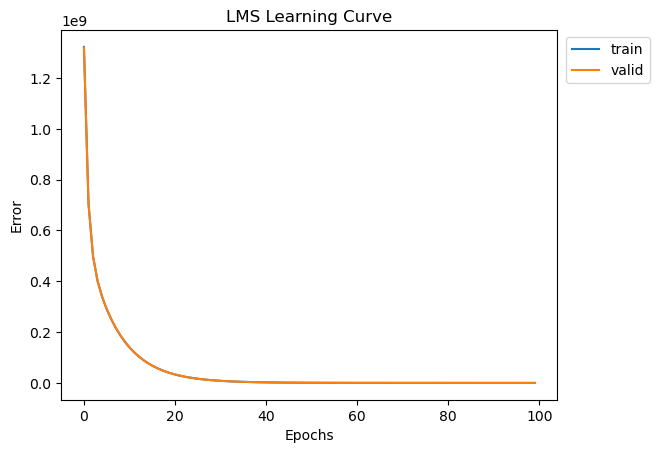

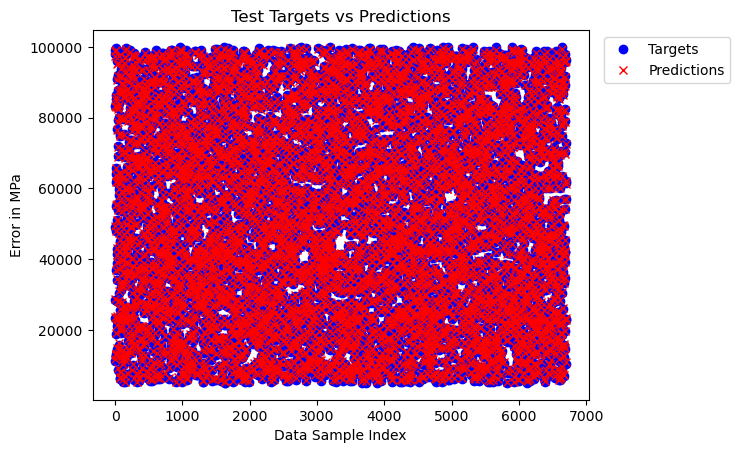

Weights:
[ 5.23638998e+04  2.43993056e+00  4.77838108e-01 -1.62048171e+00
  2.84157203e+04  2.14523968e+04  2.14024013e+04  2.85876809e+04
  1.43010641e+04 -4.19637871e+00 -4.45131640e+00  2.20427152e-02
 -5.93886332e+04]
88579.91995709365
297.6237892996688


In [14]:
# Get training and testing data
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_poly_preprocessed_data(
    # TODO 11.1
    degree = 1
)

# TODO 11.2
rlms = RidgeLeastMeanSquares(batch_size = 32, epochs = 100, alpha = .001, lamb = .001)

rlms.fit(X=X_trn, y=y_trn, X_vld=X_vld, y_vld=y_vld)

y_hat_trn = rlms.predict(X_trn)
y_hat_tst = rlms.predict(X_tst)

mse_tst = mse(y_tst, y_hat_tst)
rmse_tst = rmse(y_tst, y_hat_tst)

## Plotting Code ###
##Plot learning curve
plt.plot(rlms.trn_error, label='train')
plt.plot(rlms.vld_error, label='valid') 
plt.title("LMS Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(bbox_to_anchor=(1.2, 1.00))
plt.show()

# # Plot test targets and predictions
plt.plot(y_tst, 'ob', label='Targets')
plt.plot(y_hat_tst, 'xr', label='Predictions')
plt.xlabel("Data Sample Index")
plt.ylabel("Error in MPa")
plt.title("Test Targets vs Predictions")
plt.legend()
plt.legend(bbox_to_anchor=(1.3, 1.00))
plt.show()

### Display Weights ###
print(f"Weights:\n{rlms.w.flatten()}")

print(mse_tst)
print(rmse_tst)

### Neural Network

In [15]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_data() -> Tuple[np.ndarray, ...]:
    """ Gets preprocessed data for training, validation, and testing

        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = None, None, None, None, None, None
    
    X = patient_df.drop('Treatment_Cost_USD', axis=1).values
    y = patient_df['Treatment_Cost_USD'].values
    
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y)
    
    scaler = StandardScaler()
    
    X_trn = scaler.fit_transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)
    
    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)

In [16]:
class Linear():
    """ The linear or identity actionvation function """
    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:
        """ Computes the output of the linear activation function """
        return z
    
    @staticmethod
    def derivative(z: np.ndarray) -> np.ndarray:
        """ Computes the derivative for the linear activation function """
        
        return np.ones(z.shape)

In [17]:
class Tanh():
    """ The tanh actionvation function """
    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:
        """ Computes the output of the tanh activation function """
        return np.tanh(z)

    @staticmethod
    def derivative(z: np.ndarray) -> np.ndarray:
        """ Computes the derivative of the tanh activation function """
        return 1 - np.tanh(z)**2

In [18]:
def init_weights(
    m_input_features: int, 
    hidden_neurons: int, 
    output_neurons: int, 
) -> Tuple[np.ndarray, ...]:
    """ Initilize the hidden and output layer parameters
        
        Args:
            m_input_features: The number of input features

            hidden_neurons: The number of hidden neurons or units to 
                use in the hidden layer.

            output_neurons: The number of output neurons to use in 
                the output layer.

        Returns:
            A tuple of NumPy arrays containing the weights and biases
            for the hidden and output layers.
    """
    W1 = np.random.uniform(low=-0.5, high=0.5, size=(m_input_features, hidden_neurons))
    b1 = np.ones([1, hidden_neurons])
    
    W2 = np.random.uniform(low=-0.5, high=0.5, size=(hidden_neurons, output_neurons))
    b2 = np.ones([1, output_neurons])
    return W1, b1, W2, b2

In [19]:
def forward(
    X: np.ndarray, 
    W1: np.ndarray, 
    b1: np.ndarray,
    W2: np.ndarray, 
    b2: np.ndarray, 
) -> Tuple[np.ndarray, ...]:
    """ Forward pass for 2 layer neural network
    
        Args:
            X: Input features
            
            W1: Hidden layer weights 
            
            b1: Hidden layer baises

            W2: Output layer weights 
            
            b2: Output layer baises

        Returns:
            A tuple of NumPy arrays containing the linear combination and 
            acitvation outputs for each layer. These are needed to compute 
            the backward pass.
    """

    Z1 = X @ W1 + b1
    A1 = Tanh.activation(Z1)
    Z2 = A1 @ W2 + b2
    A2 = Linear.activation(Z2)
    
    return Z1, A1, Z2, A2

In [20]:
def output_layer_grads(
    X: np.ndarray,
    y: np.ndarray,
    W1: np.ndarray,
    Z1: np.ndarray,
    A1: np.ndarray,
    W2: np.ndarray,
    Z2: np.ndarray,
    A2: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:
    """ Compute gradients for the output layer parameters
        
        Note:
            You might not use all the passed arguments!
    
        Args:
            X: Input data given as a matrix
            
            y: Ground truth labels given as a column vector

            W1: Hidden layer weights
            
            Z1: Linear combination output for hidden layer

            A1: Activation output for hidden layer
            
            W2: Output layer weights

            Z2: Linear combination output for the output layer

            A2: Activation output or the output layer. Also 
                referred to as y_hat.
            
        Return:
            A tuple of NumPy arrays containing the average gradient 
            for the output layer weights and biases.
    """
    def delta_mse(y, A2):
        return A2 - y
    
    delta_mse_A2 = delta_mse(y, A2)
    delta_A2_Z2 = Linear.derivative(Z2)
    delta_Z2_W2 = A1
    
    delta_mse_Z2 = delta_mse_A2 * delta_A2_Z2
    delta_mse_W2 = delta_Z2_W2.T  @ delta_mse_Z2 
    W2_avg_grad = delta_mse_W2 / len(y) 
    
    delta_mse_A2 = delta_mse(y, A2)
    delta_A2_Z2 = Linear.derivative(Z2)
    delta_Z2_b2 = np.ones([len(y), 1])
    
    delta_mse_Z2 = delta_mse_A2 * delta_A2_Z2
    delta_mse_b2 = delta_Z2_b2.T @  delta_mse_Z2
    b2_avg_grad = delta_mse_b2 / len(y) 
    
    return W2_avg_grad, b2_avg_grad

In [21]:
def hidden_layer_grads(
    X: np.ndarray,
    y: np.ndarray,
    W1: np.ndarray,
    Z1: np.ndarray,
    A1: np.ndarray,
    W2: np.ndarray,
    Z2: np.ndarray,
    A2: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:
    """ Compute gradients for the hidden layer parameters
        
        Note:
            You might not use all the passed arguments!
    
        Args:
            X: Input data given as a matrix
            
            y: Ground truth labels given as a column vector

            W1: Hidden layer weights
            
            Z1: Linear combination output for hidden layer

            A1: Activation output for hidden layer
            
            W2: Output layer weights

            Z2: Linear combination output for the output layer

            A2: Activation output or the output layer. Also 
                referred to as y_hat.
            
        Return:
            A tuple of NumPy arrays containing the average gradient 
            for the hidden layer weights and biases.
    """
    def delta_mse(y, A2):
        return A2 - y
    
    delta_mse_A2 = delta_mse(y, A2)
    delta_A2_Z2 = Linear.derivative(Z2)
    delta_Z2_A1 = W2
    delta_A1_Z1 = Tanh.derivative(Z1)
    delta_Z1_W1 = X
    
    delta_mse_A1 = (delta_mse_A2 * delta_A2_Z2) @ delta_Z2_A1.T
    delta_mse_W1 = delta_Z1_W1.T @ ( delta_mse_A1 * delta_A1_Z1 )
    W1_avg_grad = delta_mse_W1 / len(y)
    
    delta_mse_A2 = delta_mse(y, A2)
    delta_A2_Z2 = Linear.derivative(Z2)
    delta_Z2_A1 = W2
    delta_A1_Z1 = Tanh.derivative(Z1)
    delta_Z1_b1 = np.ones([len(y), 1])
    
    delta_mse_A1 = (delta_mse_A2 * delta_A2_Z2) @ delta_Z2_A1.T
    delta_mse_b1 =  delta_Z1_b1.T @ (delta_mse_A1 * delta_A1_Z1)
    b1_avg_grad = delta_mse_b1 / len(y)
    
    return W1_avg_grad, b1_avg_grad

In [22]:
class NeuralNetwork():
    def __init__(self,
        hidden_neurons: int,
        output_neurons: int,
        alpha: float, 
        batch_size: int,
        epochs: int = 1,
        seed: int = 0,
    ):
        """ A two layer neural network using SGD
            
            Attributes:
                hidden_neurons: Number of hidden units/neurons.
                
                output_neurons: Number of output neuorns
                
                alpha: learning rate or step size.
                
                batch_size: Size of mini-batches for mini-batch gradient
                    descent.
                
                epochs: Number of epochs to run for mini-batch
                    gradient descent.
                    
                seed: Seed to be used for NumPy's np.random.seed() function.
    
                W1: Hidden layer weights with shape (inputs, neurons)
                
                b1: Hidden layer baises with shape (1, neurons)
                
                W2: Output layer weights with shape (inputs, neurons)
                
                b2: Output layer baises with shape (1, neurons)
    
                trn_error: Stores the training error for each epoch.
    
                vld_error: Stores the validation error for each epoch.
        """
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.batch_size = batch_size
        self.alpha = alpha
        self.epochs = epochs
        self.seed = seed
        
        self.W1, self.b1 = None, None
        self.W2, self.b2 = None, None
        self.trn_error = None
        self.vld_error = None

    def fit(
        self,
        X: np.ndarray, 
        y: np.ndarray,
        X_vld: np.ndarray = None, 
        y_vld:np.ndarray = None,
    ): 
        """ Trains a basic two layer neural network using SGD
        
            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 2D column vector

                X_vld: Validation data given as a 2D matrix. Used 
                    to compute the validation RMSE for each epoch.

                y_vld: Validation labels given as a 2D matrix. Used 
                    to compute the validation RMSE for each epoch.
                
            Returns:
                The class's own object reference. 
        """
        np.random.seed(self.seed)
        self.trn_error = []
        self.vld_error = []
        
        self.W1, self.b1, self.W2, self.b2 = init_weights(m_input_features=X.shape[1],
                                                          hidden_neurons=self.hidden_neurons,
                                                          output_neurons=self.output_neurons)
        
        for e in range(self.epochs): 
            batches = get_batches(len(X), self.batch_size)
            
            for b in batches:
                Z1, A1, Z2, A2 = forward(X[b], self.W1, self.b1, self.W2, self.b2)
                W2_mse, b2_mse = output_layer_grads(X[b], y[b], self.W1, Z1, A1, self.W2, Z2, A2)
                W1_mse, b1_mse = hidden_layer_grads(X[b], y[b], self.W1, Z1, A1, self.W2, Z2, A2)
            
                self.W1 -= self.alpha * W1_mse
                self.b1 -= self.alpha * b1_mse
                self.W2 -= self.alpha * W2_mse
                self.b2 -= self.alpha * b2_mse
            
            y_hat = self.predict(X)
            self.trn_error.append(rmse(y, y_hat))
            
            if X_vld is not None and y_vld is not None:
                vld_preds = self.predict(X_vld)
                vld_error = rmse(y_vld, vld_preds)
                self.vld_error.append(vld_error)
        
        return self
    
    def predict(self, X: np.ndarray):
        """ Make predictions using forward pass.

            Args:
                X: Testing data given as a 2D matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        _, _, _, A2 = forward(X, self.W1, self.b1, self.W2, self.b2)
        return A2.reshape(-1, 1)

ChatGPT was used for the following cell. It was used to help me decide on how to visualize the neural network outputs. It was also used to help me format the plots and curves and what variables would be needed to create the visuals for the neural network. The link to the converstation is below.ChatGPT. "How can I visualize the following data: X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data()." ChatGPT, OpenAI, 6 May 2025, chat.openai.com. https://chatgpt.com/share/681ac6d4-fe20-800b-8aca-a7211bba5603

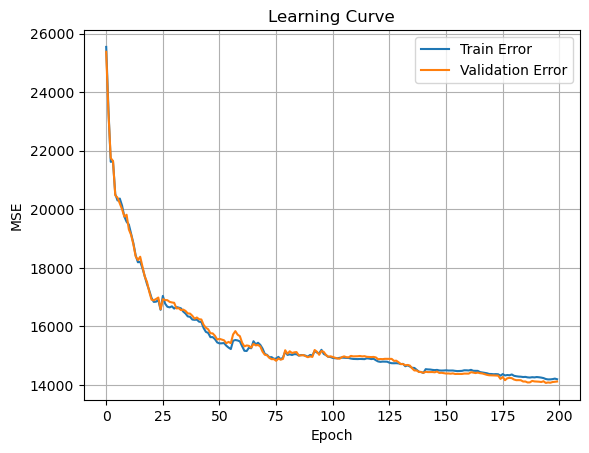

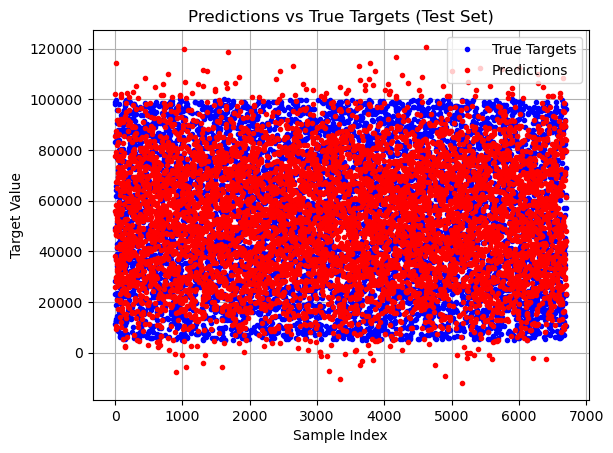

14348.258583338027


In [23]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data()

nn = NeuralNetwork(hidden_neurons=50, output_neurons=1, batch_size=512, alpha=0.01, epochs=200, seed=0)
nn.fit(X_trn, y_trn, X_vld, y_vld)

y_hat = nn.predict(X_tst)
test_rmse = rmse(y_tst, y_hat)

plt.plot(nn.trn_error, label="Train Error")
plt.plot(nn.vld_error, label="Validation Error")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(y_tst, 'b.', label='True Targets')
plt.plot(y_hat, 'r.', label='Predictions')
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.title("Predictions vs True Targets (Test Set)")
plt.legend()
plt.grid(True)
plt.show()

print(test_rmse)